<a href="https://colab.research.google.com/github/giorginolab/beta-arrestin1-sca/blob/main/PySCA_beta_arrestin_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [2]:
# Install dependencies
!conda install -q biobuilds::fasta
!conda install -q -c conda-forge -c bioconda clustalw mlpd3 hhsuite

Channels:
 - conda-forge
 - biobuilds
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - biobuilds::fasta


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    fasta-36.3.8e              |                1         3.1 MB  biobuilds
    libgcc-7.2.0               |       h69d50b8_2         304 KB  conda-forge
    openssl-3.2.1              |       hd590300_0         2.7 MB  conda-forge
    zlib-1.2.13                |       hd590300_5          91 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  fasta 

In [7]:
# Download and install pySCA
#!git clone https://github.com/ranganathanlab/pySCA.git
#!pip install ./pySCA

!pip install git+https://github.com/ranganathanlab/pySCA.git

  Cloning https://github.com/ranganathanlab/pySCA.git to /tmp/pip-req-build-huqfhcly
  Running command git clone --filter=blob:none --quiet https://github.com/ranganathanlab/pySCA.git /tmp/pip-req-build-huqfhcly
  Resolved https://github.com/ranganathanlab/pySCA.git to commit 778afb1a70fc6acc0c76ade74f35eb5cb6e8257a
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [8]:
# test
!scaCore

/usr/local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
usage: scaCore [-h] -i--input INPUTDB [-o--output OUTPUTDB] [-n NORM] [-t NTRIALS] [-l LBDA]
               [-q KSEQ] [-c KICA] [-m]
scaCore: error: the following arguments are required: -i--input


In [10]:
!git clone https://github.com/giorginolab/beta-arrestin1-sca
%cd /content/beta-arrestin1-sca

fatal: destination path 'beta-arrestin1-sca' already exists and is not an empty directory.
/content/beta-arrestin1-sca


In [11]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
from Bio.Seq import Seq
from Bio import motifs
import colorsys
from pysca import scaTools as sca
# import mpld3
import pickle as pickle
from optparse import OptionParser

%matplotlib inline

if not os.path.exists('../output/'):
    os.makedirs('../output/')

/usr/local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [12]:
db = pickle.load(open('process/arrestin.db','rb'))
Dseq = db['sequence']  #the results of scaProcessMSA
Dsca = db['sca']       #the results of scaCore
Dsect = db['sector']   #the results of scaSectorID

### I. Alignment processing and composition

In [13]:
print("After processing, the alignment size is %i sequences and %i positions" % \
      (Dseq['Nseq'], Dseq['Npos']))
print("With sequence weights, there are %i effective sequences" % (Dseq['effseqs']))

After processing, the alignment size is 124 sequences and 341 positions
With sequence weights, there are 121 effective sequences


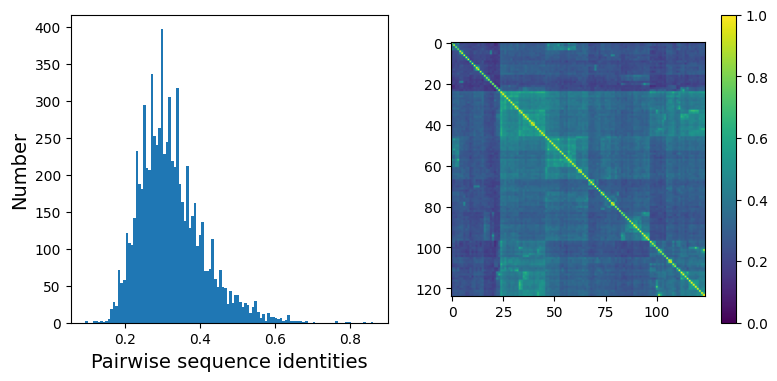

In [14]:
# List all elements above the diagonal (i<j):
listS = [Dsca['simMat'][i,j] for i in range(Dsca['simMat'].shape[0]) \
         for j in range(i+1, Dsca['simMat'].shape[1])]

# Cluster the sequence similarity matrix
Z = sch.linkage(Dsca['simMat'],method = 'complete', metric = 'cityblock')
R = sch.dendrogram(Z,no_plot = True)
ind = R['leaves']

# Plotting
plt.rcParams['figure.figsize'] = 9, 4
plt.subplot(121)
plt.hist(listS, int(round(Dseq['Npos']/3)))
plt.xlabel('Pairwise sequence identities', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.subplot(122)
plt.imshow(Dsca['simMat'][np.ix_(ind,ind)], vmin=0, vmax=1); plt.colorbar();

In [15]:
#construct a dictionary of phylogenetic groups
annot = dict()
for i, h in enumerate(Dseq['hd']):
    hs = h.split('|')
    annot[hs[0]] = sca.Annot(hs[1], hs[2], hs[3].replace('.',''))

# Most frequent taxonomic groups:
atleast = 10
for level in range(4):
    descr_list = [a.taxo.split(',')[level] for a in annot.values() \
                  if len(a.taxo.split(',')) > level]
    descr_dict = {k:descr_list.count(k) for k in descr_list \
                  if descr_list.count(k)>=atleast}
    print('\n Level %i:' % level)
    print(descr_dict)


 Level 0:
{'unknown': 124}

 Level 1:
{}

 Level 2:
{}

 Level 3:
{}


In [16]:
phylo = list();
fam_names = ['Metazoa', 'Amoebozoa', 'Viridiplantae', 'Fungi',\
             'Alveolata', 'Parabasalia']
col = (0, 0.6, 0.38, 0.18, 0.8, 0.5)
#Metazoa = red, Amoebozoa = yellow, Viridiplantae = green,
#Fungi = cyan, Alveolata = blue, Parabasalia = purple
for i,k in enumerate(fam_names):
    sf = sca.Unit()
    sf.name = fam_names[i].lower()
    sf.col = col[i]
    sf.items = [j for j,q in enumerate(Dseq['hd'])  if sf.name in q.lower()]
    phylo.append(sf)

In [17]:
gprot_names = ['Ras', 'Rab', 'Rac','Rho']
gprot_classes = list()
col = (0, 0.65, 0.15, 0.38)
#Ras=light blue, Rab = orange, Rac=yellow, Rho=dark blue
for c,k in enumerate(gprot_names):
    gp = sca.Unit()
    gp.col = col[c]
    gp.name = k
    gp.items = [i for i,h in enumerate(Dseq['hd']) if k in h]
    gprot_classes.append(gp)

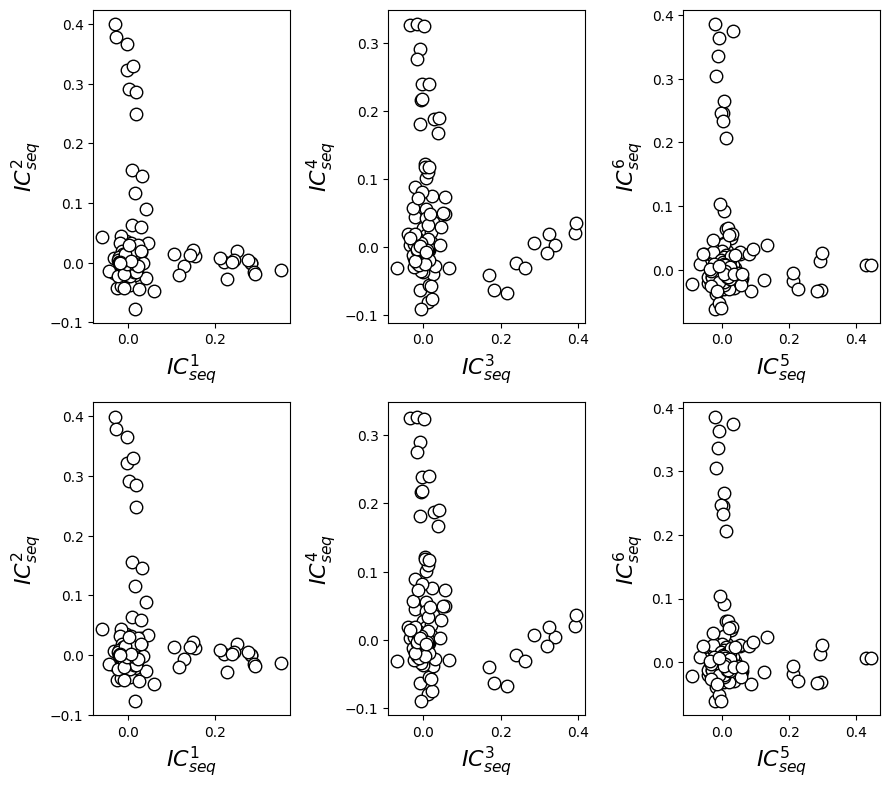

In [18]:
plt.rcParams['figure.figsize'] = 9, 8
U = Dsca['Uica'][1]
pairs = [[i,i+1] for i in range(0,6,2)]
for k,[k1,k2] in enumerate(pairs):
    plt.subplot(2,3,k+1)
    sca.figUnits(U[:,k1], U[:,k2], phylo)
    plt.xlabel(r"$IC_{seq}^{%i}$"%(k1+1), fontsize=16)
    plt.ylabel(r"$IC_{seq}^{%i}$"%(k2+1), fontsize=16)
    plt.subplot(2,3,k+4)
    sca.figUnits(U[:,k1], U[:,k2], gprot_classes)
    plt.xlabel(r"$IC_{seq}^{%i}$"%(k1+1), fontsize=16)
    plt.ylabel(r"$IC_{seq}^{%i}$"%(k2+1), fontsize=16)
plt.tight_layout()

### II. <u> First-order statistics: position-specific conservation.  <u/>

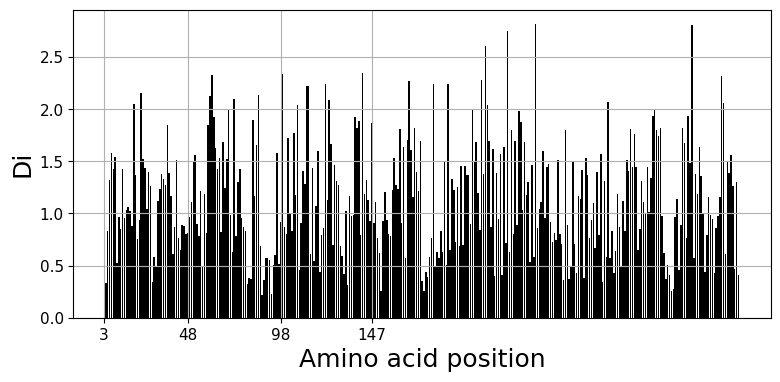

In [19]:
fig, axs = plt.subplots(1,1, figsize=(9,4))
xvals = [i+1 for i in range(len(Dsca['Di']))]
xticks = [0,45,95,144]
plt.bar(xvals,Dsca['Di'], color='k')
plt.tick_params(labelsize=11); plt.grid()
axs.set_xticks(xticks);
labels = [Dseq['ats'][k] for k in xticks]
axs.set_xticklabels(labels);
plt.xlabel('Amino acid position', fontsize=18); plt.ylabel('Di', fontsize=18);

### III. <u>Second-order statistics: conserved correlations.<u/>

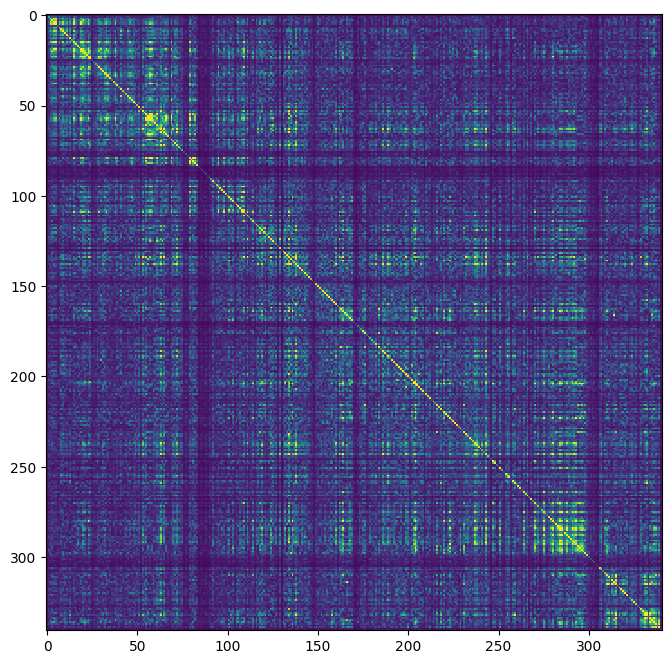

In [20]:
plt.rcParams['figure.figsize'] = 13, 8
plt.imshow(Dsca['Csca'], vmin=0, vmax=1.4,interpolation='none',\
           aspect='equal')

Number of eigenmodes to keep is 5


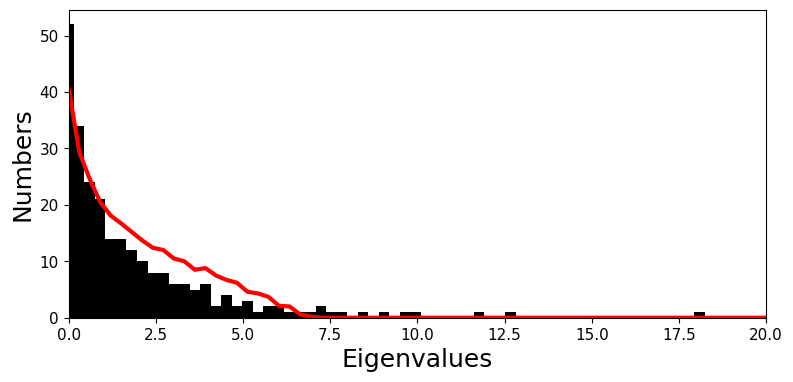

In [21]:
plt.rcParams['figure.figsize'] = 9, 4
hist0, bins = np.histogram(Dsca['Lrand'].flatten(), bins=Dseq['Npos'], \
                           range=(0,Dsect['Lsca'].max()))
hist1, bins = np.histogram(Dsect['Lsca'], bins=Dseq['Npos'], \
                           range=(0,Dsect['Lsca'].max()))
plt.bar(bins[:-1], hist1, np.diff(bins),color='k')
plt.plot(bins[:-1], hist0/Dsca['Ntrials'], 'r', linewidth=3)
plt.tick_params(labelsize=11)
plt.xlim(0,20)
plt.xlabel('Eigenvalues', fontsize=18); plt.ylabel('Numbers', fontsize=18);
print('Number of eigenmodes to keep is %i' %(Dsect['kpos']))
#mpld3.display()

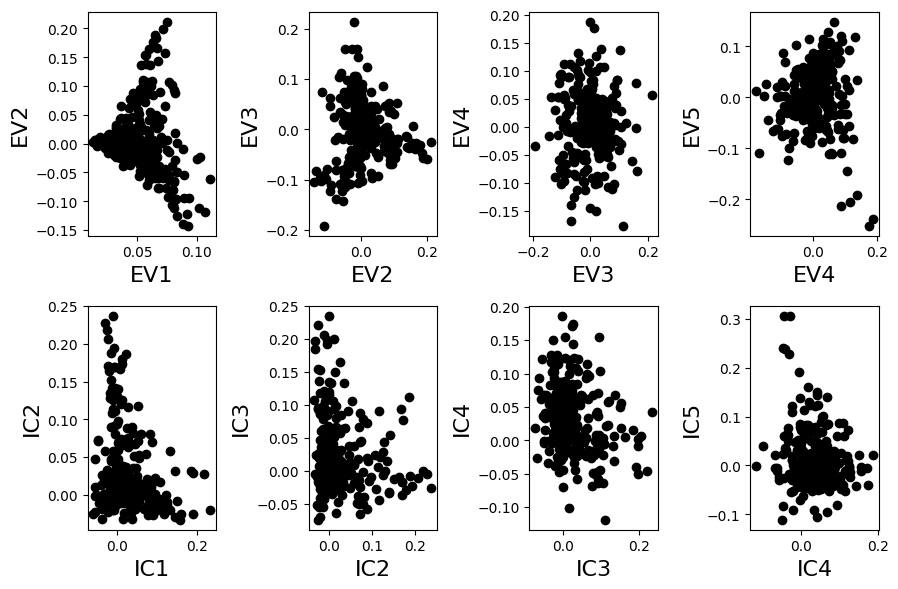

In [22]:
plt.rcParams['figure.figsize'] = 9, 6
EVs = Dsect['Vsca']
ICs = Dsect['Vpica']
pairs = [ [x,x+1] for x in range(Dsect['kpos']-1)]
ncols = len(pairs)
for k,[k1,k2] in enumerate(pairs):
    plt.subplot(2,ncols,k+1)
    plt.plot(EVs[:,k1], EVs[:,k2], 'ok')
    plt.xlabel("EV%i"%(k1+1), fontsize=16)
    plt.ylabel("EV%i"%(k2+1), fontsize=16)
    plt.subplot(2,ncols,k+1+ncols)
    plt.plot(ICs[:,k1], ICs[:,k2], 'ok')
    plt.xlabel("IC%i"%(k1+1), fontsize=16)
    plt.ylabel("IC%i"%(k2+1), fontsize=16)
plt.tight_layout()

### IV. <u> Sector decomposition. <u/>

IC 1 is composed of 27 positions:
52+54+56+66+68+73+75+120+137+141+163+189+192+193+202+210+235+236+241+242+244+258+261+262+269+310+334

IC 2 is composed of 44 positions:
5+6+7+8+12+14+16+18+19+21+22+23+24+25+26+27+32+33+35+36+37+38+41+44+48+49+50+58+59+60+61+62+67+69+72+82+85+98+101+109+111+112+114+121

IC 3 is composed of 39 positions:
104+117+122+127+132+135+139+167+171+206+207+208+223+226+240+246+250+254+267+273+278+282+283+286+287+288+290+291+294+295+296+297+298+299+300+313+346+347+349

IC 4 is composed of 23 positions:
124+126+134+146+154+156+158+169+170+178+179+187+190+196+197+201+205+215+225+229+237+285+301

IC 5 is composed of 18 positions:
161+200+219+221+234+314+316+317+318+320+322+323+324+340+341+342+344+345



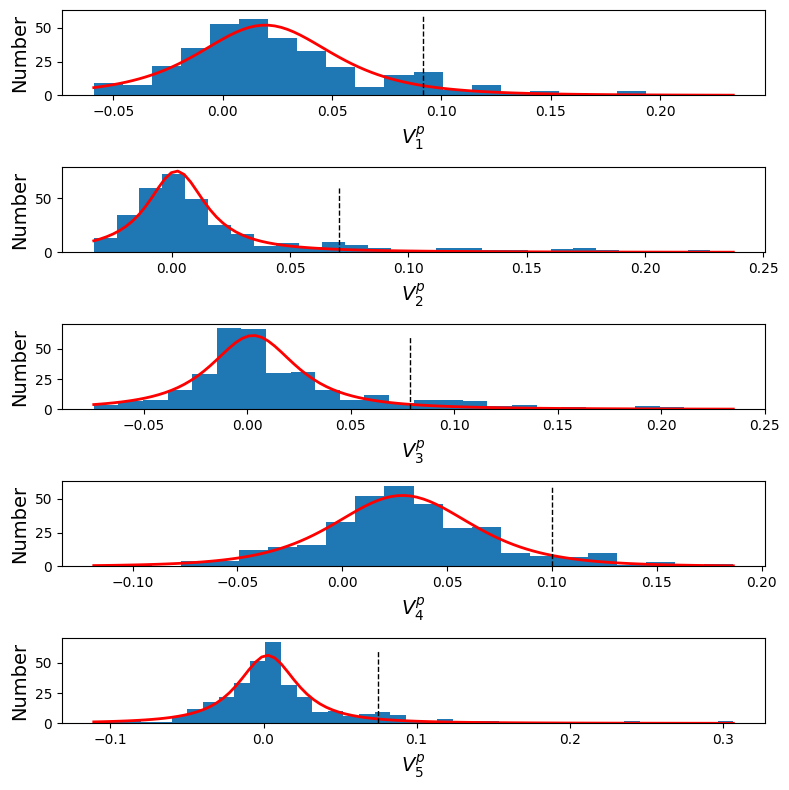

In [23]:
plt.rcParams['figure.figsize'] = 8, 8

Vpica = Dsect['Vpica']
for k in range(Dsect['kpos']):
    iqr = scoreatpercentile(Vpica[:,k],75) - scoreatpercentile(Vpica[:,k],25)
    binwidth=2*iqr*(len(Vpica)**(-0.33))
    nbins=int(round((max(Vpica[:,k])-min(Vpica[:,k]))/binwidth))
    plt.subplot(Dsect['kpos'],1,k+1)
    h_params = plt.hist(Vpica[:,k], nbins)
    x_dist = np.linspace(min(h_params[1]), max(h_params[1]), num=100)
    plt.plot(x_dist,Dsect['scaled_pd'][k],'r',linewidth = 2)
    plt.plot([Dsect['cutoff'][k],Dsect['cutoff'][k]], [0,60], 'k--',linewidth = 1)
    plt.xlabel(r'$V^p_{%i}$'%(k+1), fontsize=14)
    plt.ylabel('Number', fontsize=14)
plt.tight_layout()

for n,ipos in enumerate(Dsect['ics']):
    sort_ipos = sorted(ipos.items)
    ats_ipos = ([str(Dseq['ats'][s]) for s in sort_ipos])
    ic_pymol = ('+'.join(ats_ipos))
    print('IC %i is composed of %i positions:' % (n+1,len(ats_ipos)))
    print(ic_pymol + "\n")


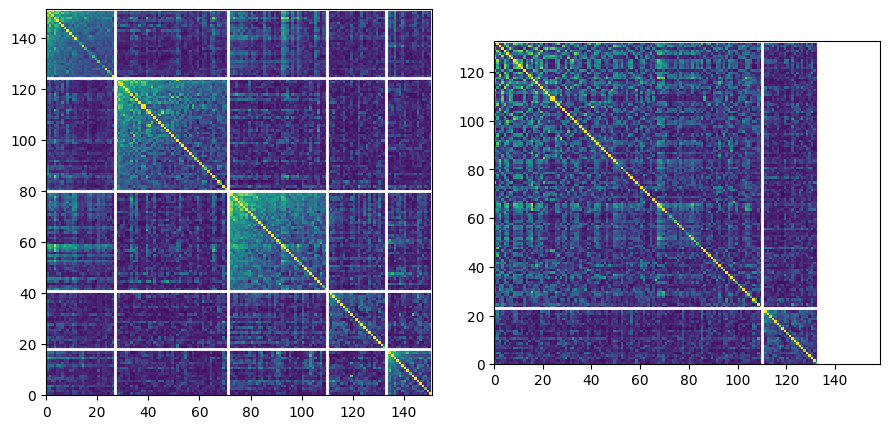

In [24]:
#plot the SCA positional correlation matrix, ordered by contribution to the top ICs
plt.rcParams['figure.figsize'] = 9, 9
plt.subplot(121)
plt.imshow(Dsca['Csca'][np.ix_(Dsect['sortedpos'], Dsect['sortedpos'])], \
           vmin=0, vmax=2.2,interpolation='none',\
           aspect='equal',extent=[0,sum(Dsect['icsize']),\
                                  0,sum(Dsect['icsize'])])
line_index=0
for i in range(Dsect['kpos']):
    plt.plot([line_index+Dsect['icsize'][i],line_index+Dsect['icsize'][i]],\
             [0,sum(Dsect['icsize'])],'w', linewidth = 2)
    plt.plot([0,sum(Dsect['icsize'])],[sum(Dsect['icsize'])-\
            line_index,sum(Dsect['icsize'])-line_index],'w', linewidth = 2)
    line_index += Dsect['icsize'][i]

#define the new sector groupings - 3 total
sec_groups = ([0,1,2],[3])
sectors = list()
c = [0.66, 0]
for n,k in enumerate(sec_groups):
    s = sca.Unit()
    all_items = list()
    all_Vp = list()
    for i in k:
        all_items = all_items+Dsect['ics'][i].items
        all_Vp = all_Vp+list(Dsect['ics'][i].vect)
    svals = np.argsort(all_Vp)
    s.items = [all_items[i] for i in svals]
    s.col = c[n]
    sectors.append(s)

#plot the re-ordered matrix
plt.subplot(122)
line_index=0
sortpos = list()
for s in sectors:
    sortpos.extend(s.items)
plt.imshow(Dsca['Csca'][np.ix_(sortpos, sortpos)], vmin=0, vmax=2.2,\
           interpolation='none',aspect='equal',\
           extent=[0,len(sortpos),0,len(sortpos)])
for s in sectors:
    plt.plot([line_index+len(s.items),line_index+len(s.items)],\
             [0,len(sortpos)],'w', linewidth = 2)
    plt.plot([0,sum(Dsect['icsize'])],[len(sortpos)-line_index,\
                    len(sortpos)-line_index],'w', linewidth = 2)
    line_index += len(s.items)
plt.tight_layout()